# Content and Objective

+ Using Poisson processes for simulating behavior of a queueing system
+ Poisson processes for arrival and departure are being sampled and state of the queue (state = number of customers in line) is being shown

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Function for Generating Poisson Processes

In [3]:
# Function for Generating Poisson Processes
def get_Poisson_Process( lamb, t ):
    """
    Function generating a Poisson process by adding-up exponential inter-arrival times
    
    IN:     lamb, parameter of Poission
            t, vector of time samples in time regime
              
    OUT:    X, Poisson process
    """
    
    # initialize max time and event times
    t_max = np.max( t )
    events = [ 0 ]
    
    # loop for generating events in such a way that t_max is being passed
    while events[ -1 ] < t_max:
    
        # now generate random events with exponentially distributed inter-event-times
        # NOTE: We will understand this choice later in this sheet/lecture 
        inter_event = np.random.exponential( 1 / lamb )

        # events by adding the inter-event times, thus generating increasing sequence of "hop times"
        events.append( events[ -1 ] + inter_event )

    # initialize process
    X = np.zeros_like( t )
    
    # generating step function of out event times
    for val_event in events:

        # positive step whenever time is larger than event time
        ind = [ int( val_t > val_event ) for val_t in t ]
        
        # adding up all steps
        X += ind 
        
    return X

# Describing a Queue by Poisson IN/OUT

In [4]:
# NOTE: Parameters lamb may be played with in order to get an insight on several different scenarios

# Poisson parameter of arrival (_A) and departure (_D) process 
lamb_A = .5
lamb_D = 1

# Decrease length for queueing
t_max = 20

# sample time and time vector
t_sample = .01
t = np.arange( 0, t_max, t_sample )


# "Arrival" process 
A = get_Poisson_Process( lamb_A, t )

# "Departure" process 
D = get_Poisson_Process( lamb_D, t)


# Initialize queue
Q = np.zeros_like( A )

# get state (queueing length) for all t
for ind in range( 1, len( A ) ):

    # boolean for arrivals and departures
    arrival = ( A[ ind ] != A[ ind - 1] )
    departure = ( D[ ind ] != D[ ind - 1 ] )
    
    # increase length if arrival occurs
    if arrival and not departure:
        Q[ ind ] = Q[ ind - 1 ] + 1
        
    # decrease if departure AND queue is not empty
    elif not arrival and departure and Q[ ind - 1 ] != 0:
        Q[ ind ] = Q[ ind - 1 ] - 1
        
    # no changes otherwise
    else:
        Q[ ind ] = Q[ ind - 1 ]


Processes:
----------
A(t): Arrivals up to time $t$
D(t): Departures up to time $t$
Q(t): Length of queue at time $t$


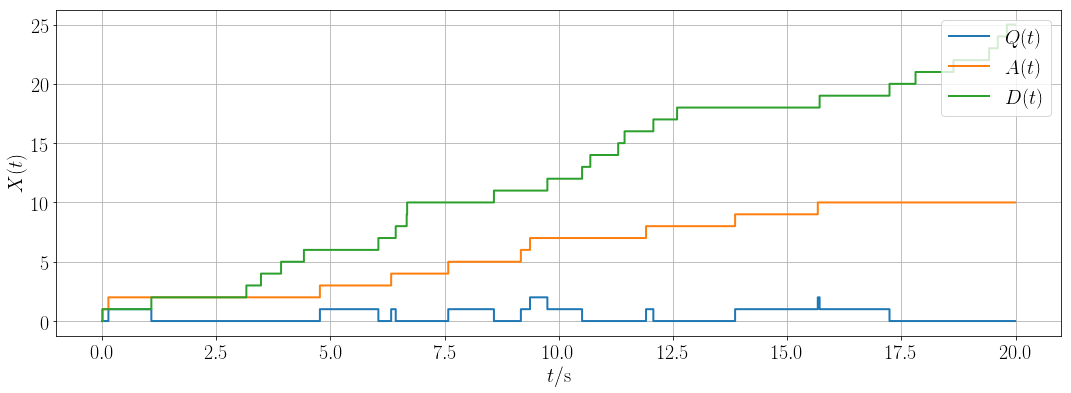

In [5]:
# plotting
plt.step( t, Q, linewidth=2.0, label='$Q(t)$', where='post')    
plt.step( t, A, linewidth=2.0, label='$A(t)$', where='post')    
plt.step( t, D, linewidth=2.0, label='$D(t)$', where='post')    

plt.xlabel('$t/\\mathrm{s}$')
plt.ylabel('$X(t)$') 
plt.grid( True )
plt.legend( loc = 'upper right' )

print('Processes:')
print('----------')
print('A(t): Arrivals up to time $t$')
print('D(t): Departures up to time $t$')
print('Q(t): Length of queue at time $t$')